In [1]:
pip install qiskit-aer

In [2]:
#para instalar o qiskit-aer lembrar de fazer o pip install
#depois ir no kernell e clicar em restart kernel and clear outputs

In [3]:
from qiskit import QuantumCircuit
from qiskit import transpile
from qiskit.circuit import ClassicalRegister, QuantumRegister
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_bloch_multivector
import numpy as np

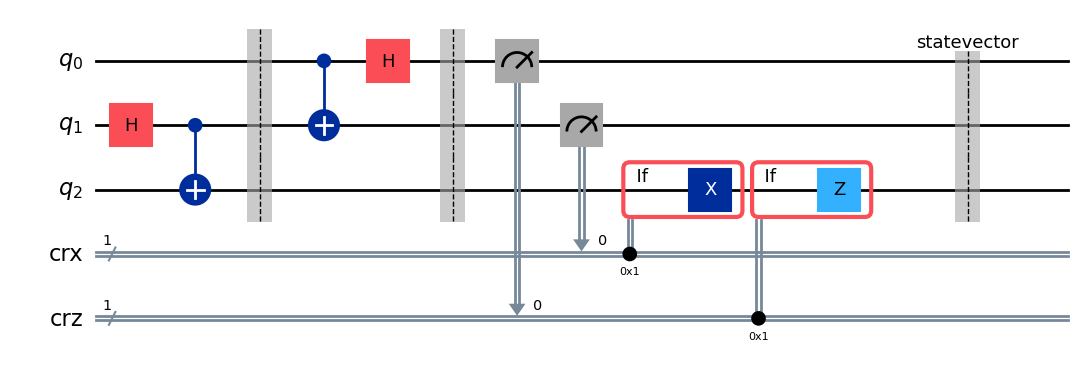

In [12]:
# Definindo registros quânticos e clássicos
qr = QuantumRegister(3, 'q')
crx = ClassicalRegister(1, 'crx')
crz = ClassicalRegister(1, 'crz')
circuit = QuantumCircuit(qr, crx, crz)

# Preparação do par emaranhado (Bell State) entre qubits 1 e 2
circuit.h(1)       # Aplicamos a porta de Hadamard no qubit 1
circuit.cx(1, 2)   # Aplicamos a porta CNOT com qubit 1 como controle e qubit 2 como alvo
circuit.barrier()  # Adicionamos uma barreira para indicar a separação das etapas do circuito

# Emaranhamento do qubit de Alice (qubit 0) com o Bell State
circuit.cx(0, 1)   # Aplicamos uma porta CNOT com qubit 0 como controle e qubit 1 como alvo
circuit.h(0)       # Aplicamos a porta de Hadamard no qubit 0
circuit.barrier()  # Adicionamos outra barreira

# Medições de Bell nos qubits de Alice
circuit.measure(qr[0], crz)  # Medimos o qubit 0 e armazenamos o resultado no bit clássico crz
circuit.measure(qr[1], crx)  # Medimos o qubit 1 e armazenamos o resultado no bit clássico crx

# Aplicando correções baseadas nos resultados das medições
with circuit.if_test((crx, 1)):
    circuit.x(2)  # Se o valor de crx for 1, aplicamos uma porta X no qubit 2

with circuit.if_test((crz, 1)):
    circuit.z(2)  # Se o valor de crz for 1, aplicamos uma porta Z no qubit 2

# Salvando o estado do vetor
circuit.save_statevector()

# Desenhando o circuito
circuit.draw("mpl")


In [18]:
# Discussão dos resultados
# =========================
# Este código implementa o protocolo de teletransporte quântico.
# - Qubit 0 (Alice): O qubit que contém o estado quântico a ser teletransportado.
# - Qubit 1 (Bell State): Parte do par emaranhado de Bell State.
# - Qubit 2 (Bob): O qubit para onde o estado quântico de Alice será teletransportado.

# Passo a passo:
# 1. Preparamos um par emaranhado (Bell State) entre os qubits 1 e 2.
# 2. Emaranhamos o qubit de Alice (qubit 0) com o Bell State.
# 3. Realizamos medições de Bell nos qubits de Alice (qubits 0 e 1).
# 4. Dependendo dos resultados das medições (crx e crz), aplicamos as correções de porta X e Z no qubit de Bob (qubit 2).

# Resultado esperado:
# O estado quântico originalmente no qubit 0 será transferido para o qubit 2, independentemente da distância entre eles,
# sem a necessidade de enviar o estado quântico diretamente. Esse processo demonstra uma das propriedades fundamentais
# da mecânica quântica e é um componente crucial para a computação quântica e comunicações quânticas seguras.